# IMPORTS

In [1]:
from warnings import filterwarnings
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import lightgbm as lgb
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

# DATA LOADING

In [2]:
hiv_df = pd.read_csv('HIV.csv', sep = ',')
#hiv_df = hiv_df.sample(1000) #subsample 1000 samples from the dataset
hiv_df

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


In [3]:
labels = hiv_df['HIV_active'].to_list()

In [4]:
smiles_list = hiv_df['smiles'].values

# FEATURE EXTRACTION

In [5]:
#get features from smiles
filterwarnings('ignore')
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

#fingerprints using MorganGenerator
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=128) for mol in molecules]
filterwarnings('default')

[22:02:35] WARNING: not removing hydrogen atom without neighbors
[22:02:35] WARNING: not removing hydrogen atom without neighbors
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use M

[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerat

[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerat

[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerat

[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerator
[22:02:37] DEPRECATION WARNING: please use MorganGenerat

[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerat

[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerat

[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerat

[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerat

[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerator
[22:02:38] DEPRECATION WARNING: please use MorganGenerat

[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerat

[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerat

[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerat

[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerator
[22:02:39] DEPRECATION WARNING: please use MorganGenerat

In [6]:
#turn fingerprints into arrays
fingerprint_arrays = [np.zeros((1,), dtype=int) for _ in fingerprints]
for i, fp in enumerate(fingerprints):
    DataStructs.ConvertToNumpyArray(fp, fingerprint_arrays[i])

In [7]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')


In [8]:
#get descriptors for each molecule
filterwarnings('ignore')
descriptors = []
#with tqdm
for mol in tqdm(molecules):
    desc = [desc[1](mol) for desc in Descriptors.descList]
    descriptors.append(desc)
filterwarnings('default')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41127/41127 [10:11<00:00, 67.29it/s]


In [9]:
#combine fingerprints and descriptors into a single dataframe
descriptor_names = [desc_name[0] for desc_name in Descriptors.descList]
descriptors_df = pd.DataFrame(descriptors, columns=descriptor_names)
data = pd.DataFrame(fingerprint_arrays, columns = [f'vec_{i}' for i in range(128)])
data = pd.concat([data, descriptors_df], axis=1)
data

,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41122,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41123,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41124,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41125,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = data.drop(columns = data.columns[data.nunique() == 1])

In [11]:
# data = pd.read_csv('~/Downloads/Telegram Desktop/hiv_data.csv', sep = ',') #load already processed data
# labels = pd.read_csv('~/Downloads/Telegram Desktop/HIV.csv', sep = ',')['HIV_active']
# #drop the first column
# data.drop(data.columns[0], axis = 1, inplace = True)

# LOGISTIC REGRESSION

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, stratify = labels)

In [13]:
#TODO remove columns automatically instead of manually

#in X_train and X_test replace nan with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train.drop(['MaxPartialCharge', 'MaxAbsPartialCharge'],axis = 1, inplace = True)
X_test.drop(['MaxPartialCharge', 'MaxAbsPartialCharge'], axis = 1, inplace = True)
X_train.drop(['MinPartialCharge', 'MinAbsPartialCharge'],axis = 1, inplace = True)
X_test.drop(['MinPartialCharge', 'MinAbsPartialCharge'], axis = 1, inplace = True)
X_train.drop('Ipc', axis = 1, inplace = True)
X_test.drop('Ipc', axis = 1, inplace = True)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression(class_weight='balanced', max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred[:,1])
roc_auc_score(y_test, y_pred[:,1])

0.805858244401304

# LIGHTGBM

## Feature Selection Shap

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, stratify = labels)

In [17]:
shap_data = data.iloc[:100].copy()
shap_labels = labels[:100]
#in X_train and X_test replace nan with 0
shap_data = shap_data.fillna(0)
shap_data.drop(['MaxPartialCharge', 'MaxAbsPartialCharge'],axis = 1, inplace = True)
shap_data.drop(['MinPartialCharge', 'MinAbsPartialCharge'],axis = 1, inplace = True)
shap_data.drop('Ipc', axis = 1, inplace = True)

/opt/conda/envs/pytorch/lib/python3.11/site-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):


/opt/conda/envs/pytorch/lib/python3.11/site-packages/shap/explainers/_tree.py:327: RuntimeWarning: overflow encountered in cast
  X = X.astype(self.model.input_dtype)


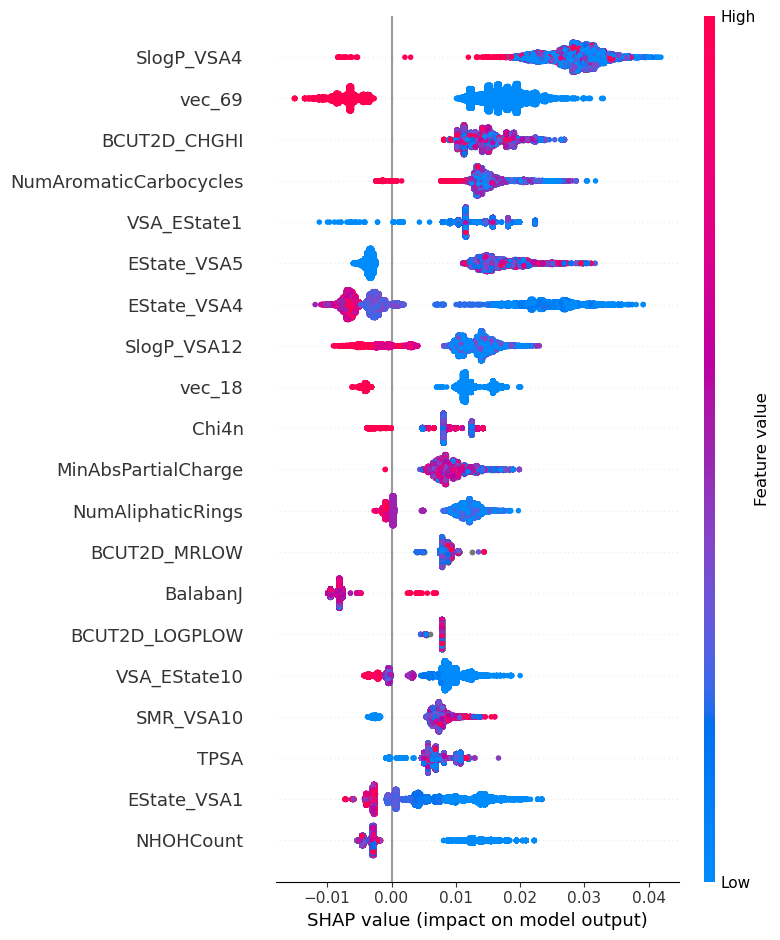

In [18]:
#leave only accepted features

#random forest
from sklearn.ensemble import RandomForestClassifier
import shap
shap.initjs()
model = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
model.fit(shap_data, shap_labels)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[:,:,0], X_train)

In [19]:
import pandas as pd
# Calculate mean absolute SHAP values
feature_importance = pd.DataFrame(
    {
        'feature': X_train.columns,
        'importance': np.abs(shap_values[:,:,1]).mean(axis=0)
    }
)
# Sort features by importance
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
# Select top features (e.g., top 10)
top_features = feature_importance.head(100)
feature_importance

,feature,importance
204,SlogP_VSA4,0.028429
69,vec_69,0.015104
148,BCUT2D_CHGHI,0.014881
238,NumAromaticCarbocycles,0.014764
221,VSA_EState1,0.013562
...,...,...
117,vec_117,0.000000
118,vec_118,0.000000
168,Chi4v,0.000000
172,Kappa2,0.000000


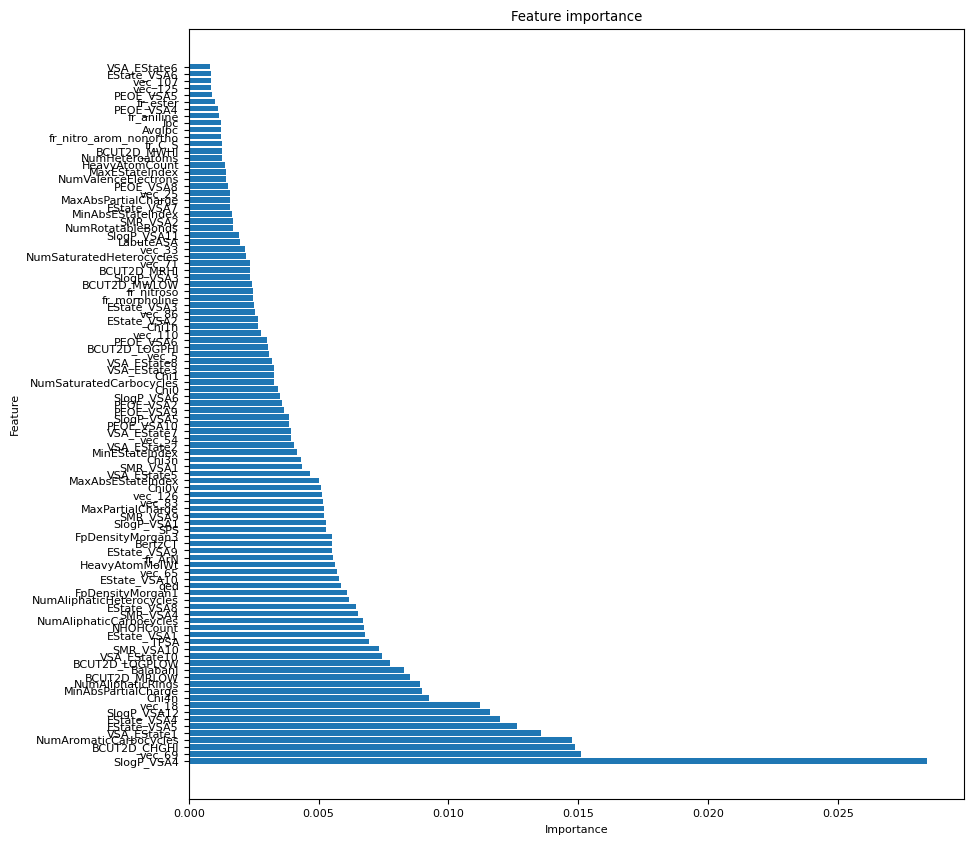

In [20]:
#plot the feature importance descendingly
plt.figure(figsize=(10, 10))
#make text size smaller
plt.rcParams.update({'font.size': 8})
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance')
plt.show()


In [21]:
top_3_features = top_features['feature'][:3].to_list()
top_3_features

['SlogP_VSA4', 'vec_69', 'BCUT2D_CHGHI']

## Optuna

In [22]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'class_weight': 'balanced',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)
    return roc_auc_score(y_test, y_pred[:,1])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-11-01 22:13:46,841] A new study created in memory with name: no-name-c201def4-b751-4215-ac80-0c603e3c42ba
/tmp/ipykernel_2643/1690559402.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_2643/1690559402.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_2643/1690559402.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('

[I 2024-11-01 22:14:18,785] Trial 5 finished with value: 0.8062715336562628 and parameters: {'lambda_l1': 0.002120547058149143, 'lambda_l2': 0.006487325156288203, 'num_leaves': 103, 'feature_fraction': 0.6362304699626805, 'bagging_fraction': 0.46189703670262033, 'bagging_freq': 7, 'min_child_samples': 81}. Best is trial 4 with value: 0.8301381162118813.
/tmp/ipykernel_2643/1690559402.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_2643/1690559402.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_2643/16905594

/tmp/ipykernel_2643/1690559402.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_2643/1690559402.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_2643/1690559402.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
/tmp/ipykernel_2643/1690559402.py:12: FutureWarning: suggest_uniform has been deprec

[I 2024-11-01 22:15:41,534] Trial 16 finished with value: 0.8243947906371675 and parameters: {'lambda_l1': 3.0819926826523526e-05, 'lambda_l2': 0.0004570122466029865, 'num_leaves': 164, 'feature_fraction': 0.8994224930256874, 'bagging_fraction': 0.9245141081836727, 'bagging_freq': 2, 'min_child_samples': 51}. Best is trial 4 with value: 0.8301381162118813.
/tmp/ipykernel_2643/1690559402.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/tmp/ipykernel_2643/1690559402.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/tmp/ipykernel_2643/16905

In [23]:
#print the best hyperparameters
study.best_params

{'lambda_l1': 5.5755857527285506e-05,
 'lambda_l2': 0.86225749158258,
 'num_leaves': 240,
 'feature_fraction': 0.8067022363333478,
 'bagging_fraction': 0.8331014007154884,
 'bagging_freq': 4,
 'min_child_samples': 69}

## Best Model

In [28]:
#fit the best model
best_params = study.best_params
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred[:,1])
roc_auc_score(y_test, y_pred[:,1])

0.8235756234324543

In [29]:
#TODO incorporate cross-validation in optuna and best model, in the logreg too
from sklearn.model_selection import cross_val_score
cross_val_score(model, data, labels, cv = 5, scoring = 'roc_auc').mean()

0.7617853282946748

# ROC CURVES AND CONFUSION MATRICES

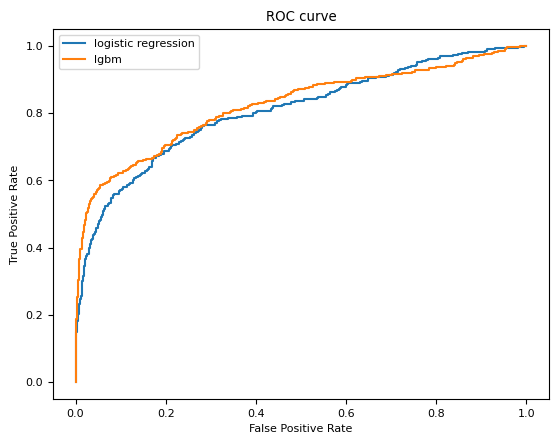

In [30]:
#draw both fpr and fpr_log
plt.plot(fpr_log, tpr_log, label = 'logistic regression')
plt.plot(fpr_lgbm, tpr_lgbm, label = 'lgbm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()